# Examples for analyzing scanner data

In [1]:
from synapticTrack.io import BeamDataIOManager
from synapticTrack.analysis import *

## Wire Scanner Data Analysis

In [2]:
beam_io_manager = BeamDataIOManager()
base_dir = '../data/scanner/2_exp_LEBT_WS'

In [3]:
filename1 = base_dir + '/' + 'ECR32-WS001-100717.txt'
beamws1 = beam_io_manager.read_scanner(scanner='wire', filename=filename1)
print(beamws1.scan_id)
print(beamws1.describe())
beamws1.data

ECR32-WS001-100717
{'scan_id': 'ECR32-WS001-100717', 'points': 500, 'x_range_mm': (np.float64(-19.94041), np.float64(19.65757)), 'y_range_mm': (np.float64(-19.44544), np.float64(19.44544))}


,x_pos,x_current,y_pos,y_current,d_pos,d_current
0,-19.94041,-1.101856e-08,19.44544,-2.249879e-08,0.0,0.0
1,-19.23330,-1.059707e-08,18.73833,-2.235568e-08,0.0,0.0
2,-18.52620,-1.058740e-08,18.03122,-2.149713e-08,0.0,0.0
3,-17.81909,-1.126219e-08,17.32412,-1.794690e-08,0.0,0.0
4,-17.11198,-1.209939e-08,16.61701,-1.018717e-08,0.0,0.0
...,...,...,...,...,...,...
495,-19.94041,-1.101856e-08,19.44544,-2.249879e-08,0.0,0.0
496,-19.94041,-1.101856e-08,19.44544,-2.249879e-08,0.0,0.0
497,-19.94041,-1.101856e-08,19.44544,-2.249879e-08,0.0,0.0
498,-19.94041,-1.101856e-08,19.44544,-2.249879e-08,0.0,0.0


/home/cspark/Work/simulation_codes-working/synapticTrack/src/synapticTrack/analysis/scanner_analysis.py:14: RuntimeWarning: invalid value encountered in sqrt
  return average, np.sqrt(variance)
/home/cspark/Work/simulation_codes-working/synapticTrack/src/synapticTrack/analysis/scanner_analysis.py:40: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_x, _ = curve_fit(gaussian, x, ix,
/home/cspark/Work/simulation_codes-working/synapticTrack/src/synapticTrack/analysis/scanner_analysis.py:42: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_y, _ = curve_fit(gaussian, y, iy,


{'x_center': np.float64(6.089519161139001), 'y_center': np.float64(-13.1378768656516), 'sigma_x': np.float64(nan), 'sigma_y': np.float64(nan), 'gaussian_fit_x_center': np.float64(6.089519161139001), 'gaussian_fit_y_center': np.float64(-13.1378768656516), 'gaussian_fit_sigma_x': np.float64(nan), 'gaussian_fit_sigma_y': np.float64(nan)}


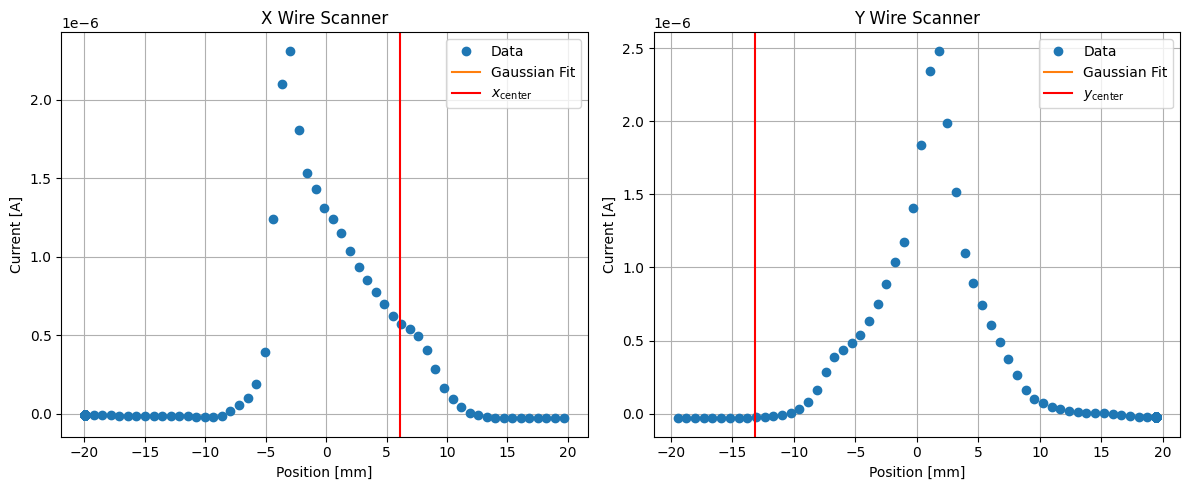

In [4]:
WS01 = analyze_wire_scanner(beamws1, plot=True, filename=base_dir+'/WS01.png')
print(WS01)

In [5]:
filename2 = base_dir + '/' + 'LEBT-WS002-100523.txt'
beamws2 = beam_io_manager.read_scanner(scanner='wire', filename=filename2)
print(beamws2.scan_id)
print(beamws2.describe())
beamws2.data

LEBT-WS002-100523
{'scan_id': 'LEBT-WS002-100523', 'points': 500, 'x_range_mm': (np.float64(-24.32447), np.float64(24.46589)), 'y_range_mm': (np.float64(-24.46589), np.float64(24.32447))}


,x_pos,x_current,y_pos,y_current,d_pos,d_current
0,-24.32447,-5.505761e-10,24.32447,5.391034e-09,0.0,0.0
1,-23.61737,-6.124146e-10,23.61737,3.935287e-09,0.0,0.0
2,-22.91026,1.199867e-10,22.91026,5.406497e-09,0.0,0.0
3,-22.20315,5.586536e-10,22.20315,3.502236e-09,0.0,0.0
4,-21.49605,1.246608e-09,21.49605,4.698923e-09,0.0,0.0
...,...,...,...,...,...,...
495,-24.32447,-5.505761e-10,24.32447,5.391034e-09,0.0,0.0
496,-24.32447,-5.505761e-10,24.32447,5.391034e-09,0.0,0.0
497,-24.32447,-5.505761e-10,24.32447,5.391034e-09,0.0,0.0
498,-24.32447,-5.505761e-10,24.32447,5.391034e-09,0.0,0.0


{'x_center': np.float64(-0.7653931774241567), 'y_center': np.float64(2.370512648642391), 'sigma_x': np.float64(1.2887589205150085), 'sigma_y': np.float64(7.988668658394298), 'gaussian_fit_x_center': np.float64(-0.7042293699311516), 'gaussian_fit_y_center': np.float64(0.3575279789817102), 'gaussian_fit_sigma_x': np.float64(2.1721855944121797), 'gaussian_fit_sigma_y': np.float64(4.8300180210788035)}
-0.7653931774241567


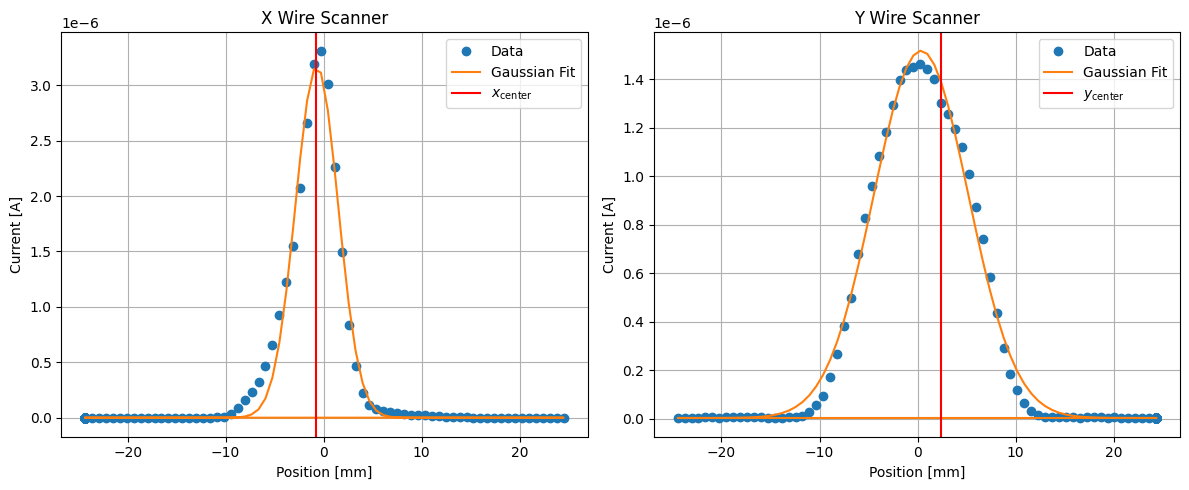

In [6]:
WS02 = analyze_wire_scanner(beamws2, plot=True, filename=base_dir+'/WS02.png')
print(WS02)
print(WS02['x_center'])

In [7]:
filename3 = base_dir + '/' + 'LEBT-WS003-100325.txt'
beamws3 = beam_io_manager.read_scanner(scanner='wire', filename=filename3)
print(beamws3.scan_id)
print(beamws3.describe())
beamws3.data

LEBT-WS003-100325
{'scan_id': 'LEBT-WS003-100325', 'points': 500, 'x_range_mm': (np.float64(-19.58686), np.float64(19.30402)), 'y_range_mm': (np.float64(-19.72828), np.float64(19.8697))}


,x_pos,x_current,y_pos,y_current,d_pos,d_current
0,-19.58686,-1.695114e-09,19.86970,1.461100e-08,0.0,0.0
1,-18.87975,-1.701590e-08,19.16259,5.516858e-09,0.0,0.0
2,-18.17264,-6.608598e-09,18.45549,1.817127e-08,0.0,0.0
3,-17.46554,-1.020666e-08,17.74838,8.303150e-09,0.0,0.0
4,-16.75843,-1.140602e-08,17.04127,3.020650e-08,0.0,0.0
...,...,...,...,...,...,...
495,-19.58686,-1.695114e-09,19.86970,1.461100e-08,0.0,0.0
496,-19.58686,-1.695114e-09,19.86970,1.461100e-08,0.0,0.0
497,-19.58686,-1.695114e-09,19.86970,1.461100e-08,0.0,0.0
498,-19.58686,-1.695114e-09,19.86970,1.461100e-08,0.0,0.0


{'x_center': np.float64(1.2951143909937106), 'y_center': np.float64(4.123426665359129), 'sigma_x': np.float64(2.146588763341112), 'sigma_y': np.float64(7.816573262406034), 'gaussian_fit_x_center': np.float64(-0.03385325299312166), 'gaussian_fit_y_center': np.float64(0.69381669948691), 'gaussian_fit_sigma_x': np.float64(4.6084282217598975), 'gaussian_fit_sigma_y': np.float64(1.334160615359141)}


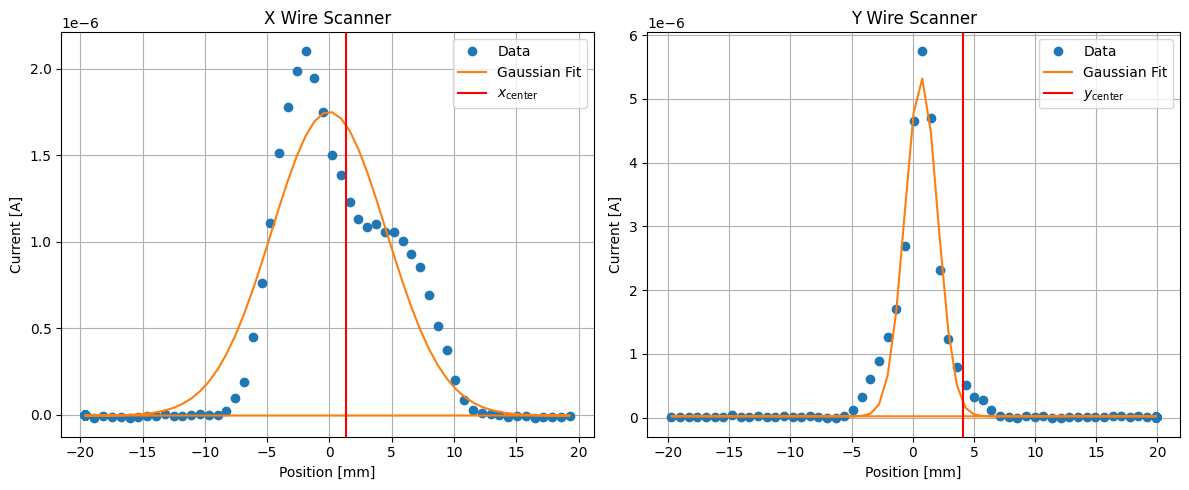

In [8]:
WS03 = analyze_wire_scanner(beamws3, plot=True, filename=base_dir+'/WS03.png')
print(WS03)

In [9]:
filename4 = base_dir + '/' + 'LEBT-WS004-100044.txt'
beamws4 = beam_io_manager.read_scanner(scanner='wire', filename=filename4)
print(beamws4.scan_id)
print(beamws4.describe())
beamws4.data

LEBT-WS004-100044
{'scan_id': 'LEBT-WS004-100044', 'points': 500, 'x_range_mm': (np.float64(-19.79899), np.float64(19.79899)), 'y_range_mm': (np.float64(-19.79899), np.float64(19.79899))}


,x_pos,x_current,y_pos,y_current,d_pos,d_current
0,-19.79899,2.624182e-10,19.79899,-8.393604e-09,0.0,0.0
1,-19.09188,-5.892133e-09,19.09188,6.894128e-09,0.0,0.0
2,-18.38478,-4.266402e-09,18.38478,-3.671825e-09,0.0,0.0
3,-17.67767,-8.601682e-09,17.67767,-1.915307e-08,0.0,0.0
4,-16.97056,-5.001850e-09,16.97056,5.384708e-09,0.0,0.0
...,...,...,...,...,...,...
495,-19.79899,2.624182e-10,19.79899,-8.393604e-09,0.0,0.0
496,-19.79899,2.624182e-10,19.79899,-8.393604e-09,0.0,0.0
497,-19.79899,2.624182e-10,19.79899,-8.393604e-09,0.0,0.0
498,-19.79899,2.624182e-10,19.79899,-8.393604e-09,0.0,0.0


/home/cspark/Work/simulation_codes-working/synapticTrack/src/synapticTrack/analysis/scanner_analysis.py:14: RuntimeWarning: invalid value encountered in sqrt
  return average, np.sqrt(variance)
/home/cspark/Work/simulation_codes-working/synapticTrack/src/synapticTrack/analysis/scanner_analysis.py:42: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_y, _ = curve_fit(gaussian, y, iy,


{'x_center': np.float64(-0.2976900144253158), 'y_center': np.float64(-28.11428181516631), 'sigma_x': np.float64(6.862092663551866), 'sigma_y': np.float64(nan), 'gaussian_fit_x_center': np.float64(-0.7466745314187705), 'gaussian_fit_y_center': np.float64(-28.11428181516631), 'gaussian_fit_sigma_x': np.float64(7.769398864187355), 'gaussian_fit_sigma_y': np.float64(nan)}


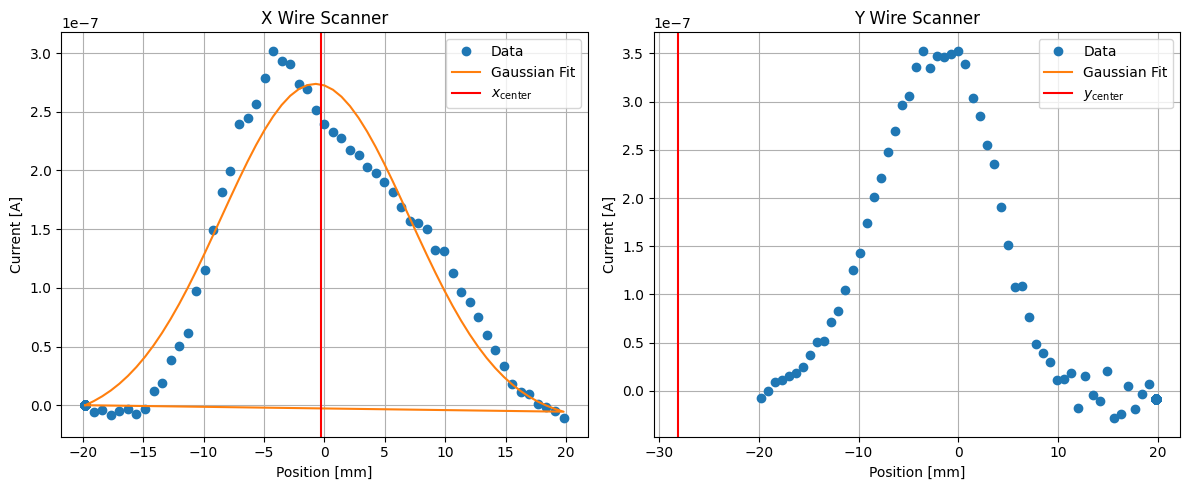

In [10]:
WS04 = analyze_wire_scanner(beamws4, plot=True, filename=base_dir+'/WS04.png')
print(WS04)

## Allison Scanner Data Analysis

In [11]:
beam_io_manager = BeamDataIOManager()
base_dir = '../data/scanner/3_exp_Allison'

In [12]:
filename5 = base_dir + '/' + '101614_X.txt'
beamas1 = beam_io_manager.read_scanner(scanner='allison', filename=filename5)
print(beamas1.scan_id)
print(beamas1.describe())
beamas1.data

101614_X
{'scan_id': '101614_X', 'points': 10000, 'x_range_mm': (np.float64(-29.99901), np.float64(30.001)), 'xp_range_mrad': (np.float64(-14.2125), np.float64(14.2125)), 'current_range_A': (np.float64(-4.976095e-10), np.float64(3.193326e-07))}


,x,xp,x_current,hv,y_current
0,30.001,-14.21250,0.0,-150.0,0.000000e+00
1,30.001,-13.73875,0.0,-145.0,0.000000e+00
2,30.001,-13.26500,0.0,-140.0,0.000000e+00
3,30.001,-12.79125,0.0,-135.0,-6.570788e-11
4,30.001,-12.31750,0.0,-130.0,3.285394e-11
...,...,...,...,...,...
9995,0.000,0.00000,0.0,0.0,0.000000e+00
9996,0.000,0.00000,0.0,0.0,0.000000e+00
9997,0.000,0.00000,0.0,0.0,0.000000e+00
9998,0.000,0.00000,0.0,0.0,0.000000e+00


{'x_center': np.float64(2.855346778787225), 'xp_center': np.float64(-2.3879196229150765), 'sigma_x': np.float64(5.639152635995243), 'sigma_xp': np.float64(2.7523580177469165), 'gaussian_fit_x_center': np.float64(6.799754450997155), 'gaussian_fit_xp_center': np.float64(-2.835200129191674), 'gaussian_fit_sigma_x': np.float64(-2.7847339513400287), 'gaussian_fit_sigma_xp': np.float64(1.1572081207960618), 'covariance_x_xp': np.float64(-1.3048925921021257), 'emittance_rms': np.float64(15.466016650622558), 'emittance_geometric': np.float64(15.520966970980167)}


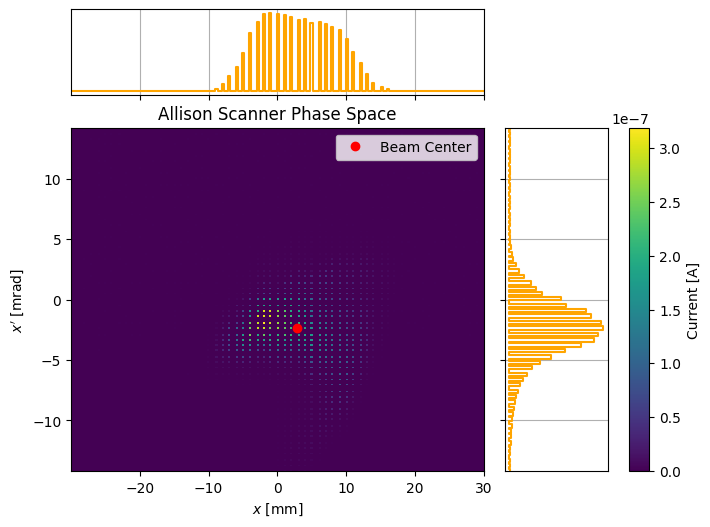

In [13]:
AS01 = analyze_allison_scanner_2d(beamas1, bins=200, filename=base_dir+'/AS01.png')
print(AS01)

{'x_center': np.float64(2.855346778787225), 'xp_center': np.float64(-2.3879196229150765), 'sigma_x': np.float64(5.639152635995243), 'sigma_xp': np.float64(2.7523580177469165), 'gaussian_fit_x_center': np.float64(6.799754450997155), 'gaussian_fit_xp_center': np.float64(-2.835200129191674), 'gaussian_fit_sigma_x': np.float64(-2.7847339513400287), 'gaussian_fit_sigma_xp': np.float64(1.1572081207960618), 'covariance_x_xp': np.float64(-1.3048925921021257), 'emittance_rms': np.float64(15.466016650622558), 'emittance_geometric': np.float64(15.520966970980167)}


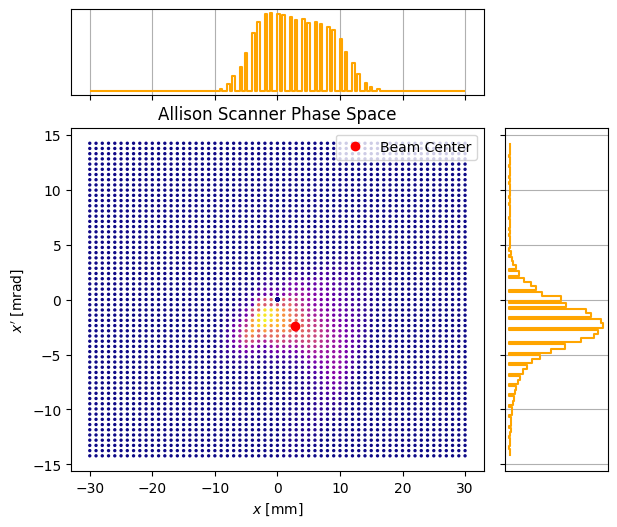

In [14]:
AS01_1 = analyze_allison_scanner_2d(beamas1, density=False, filename=base_dir+'/AS02.png')
print(AS01_1)

In [15]:
filename6 = base_dir + '/' + '102829_Y.txt'
beamas2 = beam_io_manager.read_scanner(scanner='allison', filename=filename6)
print(beamas2.scan_id)
print(beamas2.describe())
beamas2.data

102829_Y
{'scan_id': '102829_Y', 'points': 10000, 'x_range_mm': (np.float64(-30.0), np.float64(30.0)), 'xp_range_mrad': (np.float64(-14.2125), np.float64(14.2125)), 'current_range_A': (np.float64(-2.299776e-10), np.float64(2.263308e-07))}


,x,xp,x_current,hv,y_current
0,30.0,-14.21250,6.570788e-11,-150.0,9.952189e-11
1,30.0,-13.73875,0.000000e+00,-145.0,6.634793e-11
2,30.0,-13.26500,-6.570788e-11,-140.0,-3.317397e-11
3,30.0,-12.79125,-6.570788e-11,-135.0,-6.634793e-11
4,30.0,-12.31750,0.000000e+00,-130.0,0.000000e+00
...,...,...,...,...,...
9995,0.0,0.00000,0.000000e+00,0.0,0.000000e+00
9996,0.0,0.00000,0.000000e+00,0.0,0.000000e+00
9997,0.0,0.00000,0.000000e+00,0.0,0.000000e+00
9998,0.0,0.00000,0.000000e+00,0.0,0.000000e+00


{'x_center': np.float64(-2.18870609230547), 'xp_center': np.float64(-4.777986136149849), 'sigma_x': np.float64(4.365135543184439), 'sigma_xp': np.float64(2.9292488263259657), 'gaussian_fit_x_center': np.float64(-4.887277686747518), 'gaussian_fit_xp_center': np.float64(-5.493810812415098), 'gaussian_fit_sigma_x': np.float64(2.0040627097240127), 'gaussian_fit_sigma_xp': np.float64(2.119916711957605), 'covariance_x_xp': np.float64(2.190574927096876), 'emittance_rms': np.float64(12.597527811779887), 'emittance_geometric': np.float64(12.786568166626775)}


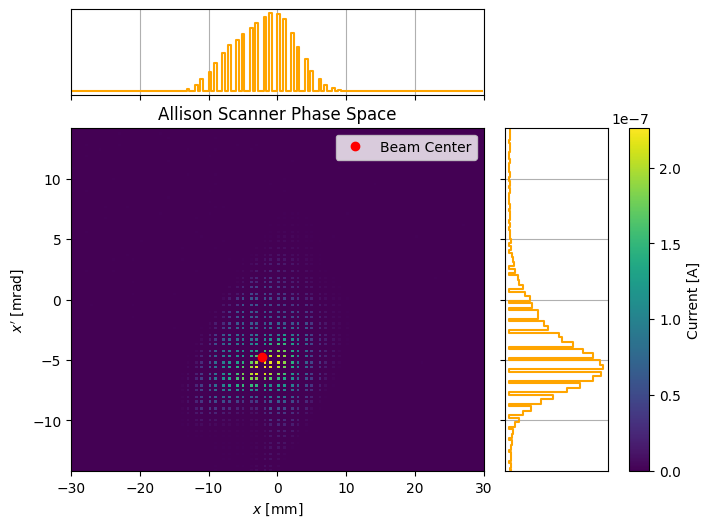

In [16]:
AS02 = analyze_allison_scanner_2d(beamas2, filename=base_dir+'/AS03.png')
print(AS02)

{'x_center': np.float64(-2.18870609230547), 'xp_center': np.float64(-4.777986136149849), 'sigma_x': np.float64(4.365135543184439), 'sigma_xp': np.float64(2.9292488263259657), 'gaussian_fit_x_center': np.float64(-4.887277686747518), 'gaussian_fit_xp_center': np.float64(-5.493810812415098), 'gaussian_fit_sigma_x': np.float64(2.0040627097240127), 'gaussian_fit_sigma_xp': np.float64(2.119916711957605), 'covariance_x_xp': np.float64(2.190574927096876), 'emittance_rms': np.float64(12.597527811779887), 'emittance_geometric': np.float64(12.786568166626775)}


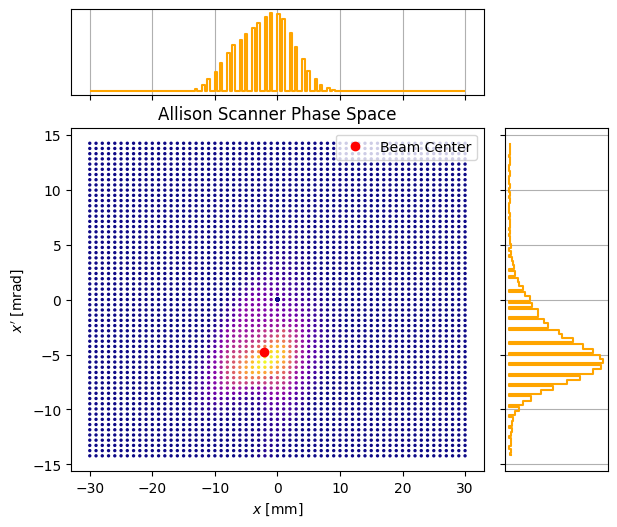

In [17]:
AS02_1 = analyze_allison_scanner_2d(beamas2, density=False, filename=base_dir+'/AS04.png')
print(AS02_1)

## Beam Centroid Calculations

In [18]:
beam_centroids = {
    "WS01": {"x": WS01["x_center"], "y": WS01["y_center"]},
    "WS02": {"x": WS02["x_center"], "y": WS02["y_center"]},
    "WS03": {"x": WS03["x_center"], "y": WS03["y_center"]},
    "WS04": {"x": WS04["x_center"], "y": WS04["y_center"]},
    "AS01": {"x": AS01["x_center"], "xp": AS01["xp_center"], "y": AS02["x_center"], "yp": AS02["xp_center"]},  # [mm], [mrad]
}

In [19]:
beam_centroids['AS01']

{'x': np.float64(2.855346778787225),
 'xp': np.float64(-2.3879196229150765),
 'y': np.float64(-2.18870609230547),
 'yp': np.float64(-4.777986136149849)}

In [20]:
reference_x = 0.0  # mm
reference_y = 0.0  # mm

centroid_shifts = {}
for scanner, center in beam_centroids.items():
    dx = center.get("x", 0.0) - reference_x
    dy = center.get("y", 0.0) - reference_y if "y" in center else None
    #dtheta = center.get("x'", None)
    centroid_shifts[scanner] = {"dx [mm]": dx, "dy [mm]": dy}

import pandas as pd
centroid_shifts_df = pd.DataFrame(centroid_shifts).T
print(centroid_shifts_df)

       dx [mm]    dy [mm]
WS01  6.089519 -13.137877
WS02 -0.765393   2.370513
WS03  1.295114   4.123427
WS04 -0.297690 -28.114282
AS01  2.855347  -2.188706
